In [2]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.special
import more_itertools as mit

In [16]:
"""BUSQUEDA SECUENCIAL, UTILIZADA CUANDO LA LISTA TIENE POCOS ELEMENTOS"""
def busqueda_secuencial(lista, valor):
    for i in lista:
        if i == valor:
            return "Valor encontrado " + str(valor) 
        else:
            return "Valor no encontrado " + str(valor) 

"""BUSQUEDA BINARIA RECURSIVA, UTILIZA BUSQUEDA SECUENCIAL CUANDO LA LISTA TIENE MENOS DE 10 ELEMENTOS"""
def busqueda_binaria(lista, valor):
    
    mid = len(lista)//2

    if len(lista) < 10:
        return busqueda_secuencial(lista, valor)
    elif valor == lista[mid]:
        return "Valor encontrado " + str(valor) 
    elif valor < lista[mid]:
        return busqueda_binaria(lista[:mid],valor)
    else:
        return busqueda_binaria(lista[mid:],valor)

"""BUSQUEDA TERNARIA RECURSIVA, UTILIZA BUSQUEDA SECUENCIAL CUANDO LA LISTA TIENE MENOS DE 10 ELEMENTOS"""
def busqueda_ternaria(lista, valor):
    tercio1 = len(lista)//3
    tercio2 = 2*tercio1

    if len(lista) < 10:
        return busqueda_secuencial(lista, valor)
    elif valor == lista[tercio1] or valor == lista[tercio2]:
        return "Valor encontrado " + str(lista[tercio1])
    elif valor < lista[tercio1]:
        return busqueda_ternaria(lista[:tercio1],valor)
    elif valor < lista[tercio2]:
        return busqueda_ternaria(lista[tercio1:tercio2],valor)
    else:
        return busqueda_ternaria(lista[tercio2:],valor)

In [21]:
n_min = 10
n_max = 100000
val_buscado = n_max + 1
st = 500
iteraciones = 10 # iteraciones del benchmark

t_bin = list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = mit.random_combination(range(1, n_max), n)
        suma += timeit.timeit(lambda: busqueda_binaria(v,val_buscado), number = 1)
    promedio = suma / iteraciones
    t_bin.append(promedio)
    
t_ter = list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = mit.random_combination(range(1, n_max), n)
        suma += timeit.timeit(lambda: busqueda_ternaria(v,val_buscado), number = 1)
    promedio = suma / iteraciones
    t_ter.append(promedio)

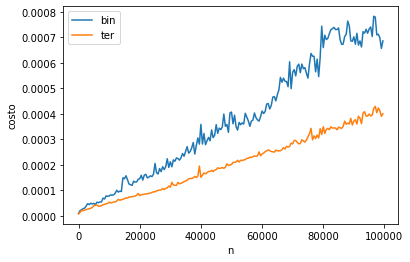

In [22]:
eje_x = list(range(n_min, n_max, st))
plt.plot(eje_x, t_bin, label = 'bin')
plt.xlabel('n')
plt.ylabel('costo')

plt.plot(eje_x, t_ter, label = 'ter')
plt.legend()